# Retina neural encoder

execution time:

tested on:  

- Apple M4 16GB RAM (no GPU required)
- Ubuntu 180 GB RAM


## Setup 


activate fisher_info_limits

```python
python -m ipykernel install --user --name fisher_info_limits --display-name "fisher_info_limits"
```

In [9]:
# import packages
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pickle5 as pickle
from scipy.stats import spearmanr, wilcoxon

from matplotlib.gridspec import GridSpec as GS
import math
#import import_ipynb
#import ipynb.fs.full.ssiProjectModule as ssiMod

main_dir = '/home/steeve/steeve/idv/code/fisher-info-limits'
os.chdir(main_dir)

# import custom package
import ssiProjectModule as ssiMod

# setup parameters
sample_size = 500
theta_step = 2
stim = np.arange(0,360,theta_step)

# setup paths
#main_dir = '/home/cparis/00PhD/'
dat_dir_in = os.path.join(main_dir, 'data/decoding_analysis/')
data_dir = 'data/bayer_decoding_error/'+f'Bayes_Dec_Errs_{sample_size}reps_thetastep{theta_step}'+'.npz'

title = f'Stretch_BioQuads_multiplied_w_mean_g__theta_step={theta_step}_original_g_20240509_AREA.pkl'

constant = 360/np.sqrt(2*np.pi*math.e)

with open(dat_dir_in+title, 'rb') as rick:
    data_dict = pickle.load(rick)

bio_idx = np.where(data_dict['all_multipliers']==1.)[0][0]

chosen_quads = np.array([201, 125, 104, 491])

In [10]:
bayes_dec_err = dict(np.load(data_dir))['bayes_final_angles_errs']

fisher_info = np.array([ssiMod.FISHER_POISSON(stim, quad_tc) for quad_tc in data_dict['all_quad_tc'][:,bio_idx]])

ssis = data_dict['all_ssis'][:,bio_idx]

201
125
104
491
WilcoxonResult(statistic=np.float64(0.0), pvalue=np.float64(8.762734565082682e-108))


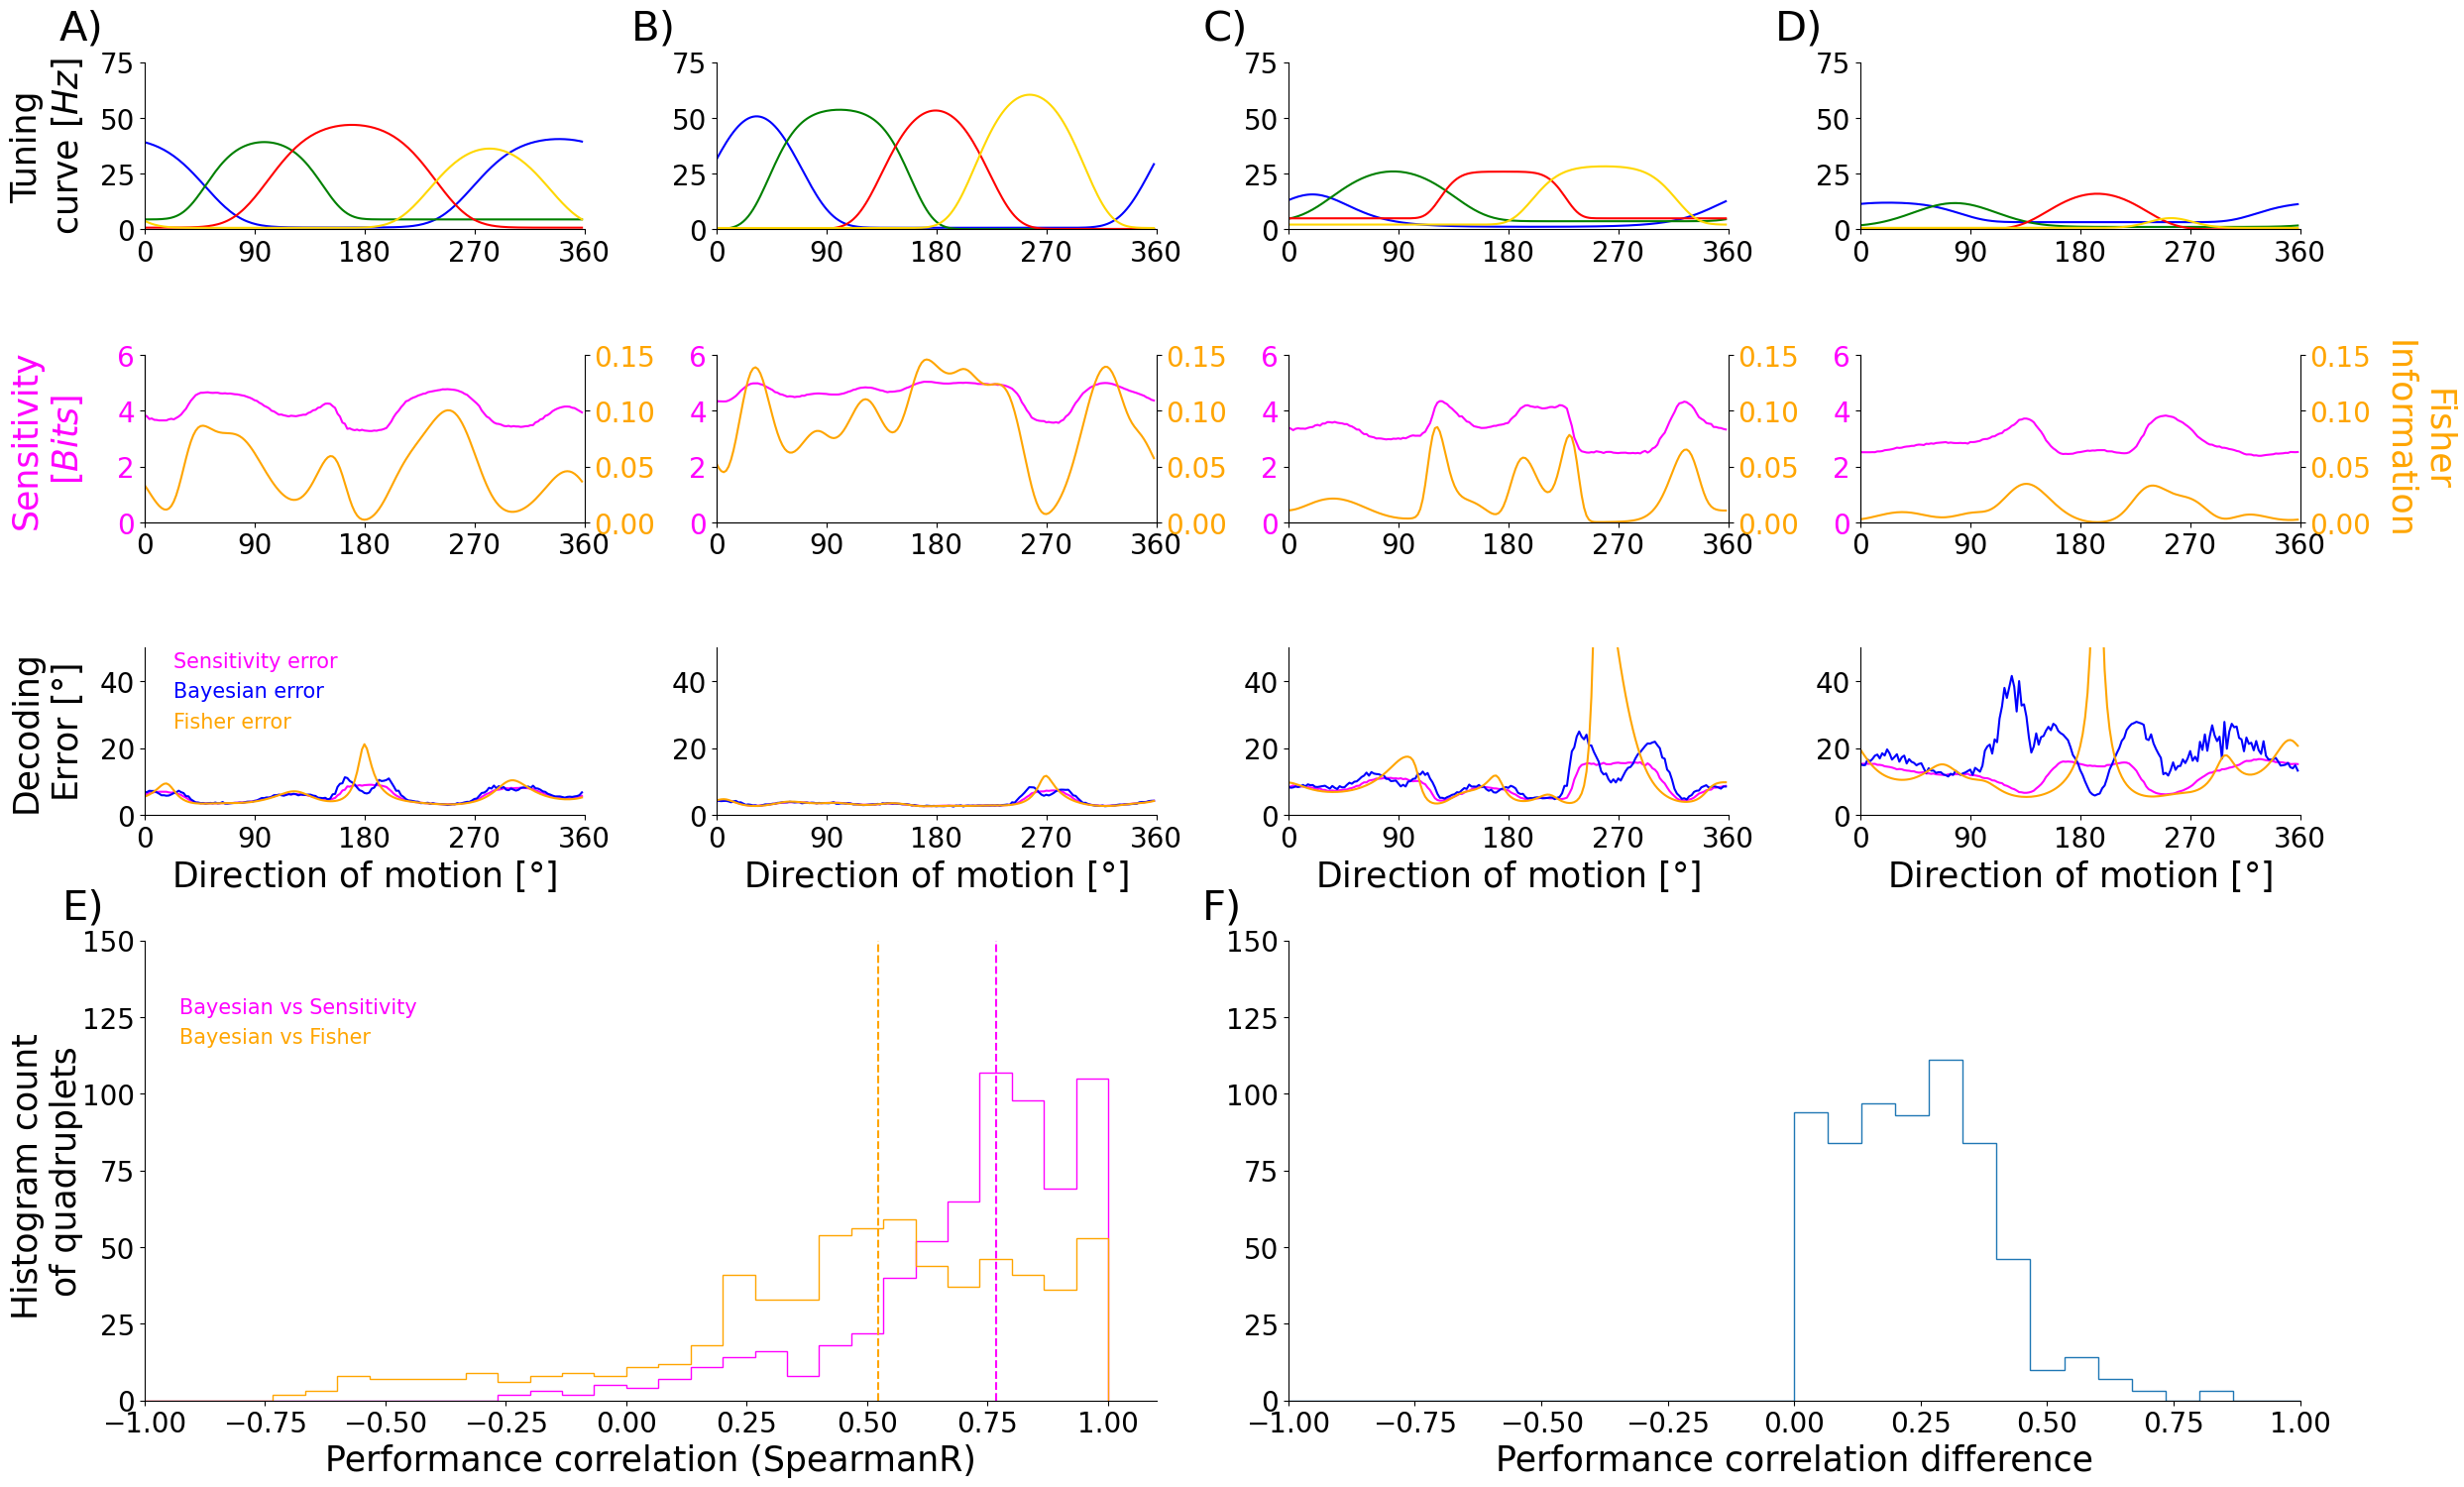

In [ ]:
labelsize = 25
legend_fontsize = 15
text_size = 30
tick_labelsize = 20
plt.rcParams['xtick.labelsize']=tick_labelsize
plt.rcParams['ytick.labelsize']=tick_labelsize
mpl.rcParams['axes.spines.right']=False

fig = plt.figure(figsize=(25,15))

gs = GS(5,4,wspace=0.3, hspace=0.75)
colors = ['blue', 'green', 'red', 'gold']
letters = ['A)', 'B)', 'C)', 'D)']

for i, quad in enumerate(chosen_quads):
    print(quad)
    
#     TUNING CURVE ROW
    ax = fig.add_subplot(gs[0,i])
    for j, tc in enumerate(data_dict['all_quad_tc'][quad, bio_idx]):
        ax.plot(stim, tc/1.6, color = colors[j])
    ax.text(-70, 85, letters[i], size=text_size)
    ax.set_xlim(0,360)
    ax.set_ylim(0,75)    
    ax.set_xticks(np.arange(0,361, 90))
    ax.set_yticks(np.arange(0,76, 25))
#     if i==0:
#         ax.set_xlabel(r'Direction of motion [$\degree$]')
        

#     SSI ROW
        
    ax1 = fig.add_subplot(gs[1,i])
    ax2 = ax1.twinx()
    
    ax1.plot(stim, ssis[quad], color = 'magenta')
    ax2.plot(stim, fisher_info[quad], color = 'orange')
    ax2.spines['right'].set_visible(True)
    ax1.tick_params('y', labelcolor = 'magenta')
    ax2.tick_params('y', labelcolor = 'orange')
    
    ax1.set_xlim(0,360)
    ax1.set_ylim(0,6)  
    ax2.set_ylim(0,0.15)
    ax1.set_xticks(np.arange(0,361, 90))
    ax1.set_yticks(np.arange(0,6.1, 2))
    ax2.set_yticks(np.arange(0,0.151, 0.05))   
    
    ax3 = fig.add_subplot(gs[2,i])
    ax3.plot(stim, constant*math.e**(-ssis[quad]*np.log(2)), \
            color = 'magenta', label = r'Sensitivity error')
    ax3.plot(stim, bayes_dec_err[quad], color = 'blue', label = 'Bayesian error')
    ax3.plot(stim, 1/np.sqrt(fisher_info[quad]), color = 'orange', label = r'Fisher error')
    if i==0:
        ax3.legend(handlelength = 0, labelcolor = 'linecolor', frameon=0, \
                   loc = (0.01, 0.45), fontsize = legend_fontsize)
    
    ax3.set_xlim(0,360)
    ax3.set_ylim(0,50)    
    ax3.set_xticks(np.arange(0,361, 90))
    ax3.set_xlabel(r'Direction of motion [$\degree$]', size = labelsize)
    
    
    if i==0:
        ax.yaxis.set_label_coords(-0.135, y=0.5)
        ax1.yaxis.set_label_coords(-0.135, y=0.5)
        ax3.yaxis.set_label_coords(-0.135, y=0.5)
        
        ax.set_ylabel('Tuning\n'+r'curve [$Hz$]', size = labelsize)  
        ax1.set_ylabel('Sensitivity\n'+r'[$Bits$]', color = 'magenta', size = labelsize)
        ax3.set_ylabel('Decoding\n'+r'Error [$\degree$]', size = labelsize)  
    if i==len(chosen_quads)-1:
        ax2.yaxis.set_label_coords(1.35, y=0.5)
        ax2.set_ylabel('Fisher\n'+r'Information', rotation=270, color = 'orange', size = labelsize)
        
ax4 = fig.add_subplot(gs[3:5,:2])

spearman_ssi_v_bayes = np.array([spearmanr(-data_dict['all_ssis'][idx, bio_idx], el).correlation \
                                           for idx, el in enumerate(bayes_dec_err)])
spearman_fisher_v_bayes = np.array([spearmanr(1/np.sqrt(fisher_info[idx]), el).correlation \
                                           for idx, el in enumerate(bayes_dec_err)])

ax4.hist(spearman_ssi_v_bayes, range=(-1,1), bins = 30, color = 'magenta', histtype = 'step')
ax4.plot([0],[0], color = 'magenta', label = r'Bayesian vs Sensitivity')

ax4.hist(spearman_fisher_v_bayes, range=(-1,1), bins = 30, color = 'orange', histtype = 'step')
ax4.plot([0],[0], color = 'orange',label = r'Bayesian vs Fisher')
ax4.yaxis.set_label_coords(-0.075, y=0.5)


ax4.axvline(np.median(spearman_ssi_v_bayes), color = 'magenta', linestyle='dashed')
ax4.axvline(np.median(spearman_fisher_v_bayes), color = 'orange', linestyle='dashed')
#     ax4.text(-0.9, 75, f'p-value<<{0.00001:.0e}', size = 12)
ax4.set_xticks(np.arange(-1,1.1,0.25))
ax4.set_yticks(np.arange(0,151,25))
print(wilcoxon(spearman_ssi_v_bayes-spearman_fisher_v_bayes))
ax4.set_xlim(left=-1)
ax4.set_ylim(0,150)
ax4.set_xlabel('Performance correlation (SpearmanR)', size=labelsize)
ax4.yaxis.set_label_coords(-0.06, y=0.5)
ax4.set_ylabel('Histogram count \nof quadruplets', size=labelsize)

ax4.legend(handlelength = 0, labelcolor = 'linecolor', frameon=0, fontsize = legend_fontsize, loc=(0.01, 0.75))
ax4.text(-1.17, 157, 'E)', size=text_size)


ax5 = fig.add_subplot(gs[3:5,2:])
ax5.yaxis.set_label_coords(-0.06, y=0.5)

ax5.hist(spearman_ssi_v_bayes- spearman_fisher_v_bayes, bins = 30, range = (-1,1),\
         align ='mid', histtype='step')
ax5.set_xticks(np.arange(-1,1.1, 0.25))
ax5.set_yticks(np.arange(0,151,25))
ax5.set_xlim(-1,1)
ax5.set_ylim(0,150)
ax5.set_xlabel('Performance correlation difference', size=labelsize)
# ax5.set_ylabel('Histogram count \nof quadruplets', size=labelsize)
ax5.text(-1.17, 157, 'F)', size=text_size)

gs.update(left=0.055,right=0.925,top=0.95,bottom=0.05)#,wspace=0.3,hspace=0.5)

# save figure
plt.savefig('figures/fig2_retina_encoder.svg', bbox_inches='tight', dpi = 400)

In [8]:
print(np.median(spearman_ssi_v_bayes), np.mean(spearman_ssi_v_bayes), spearman_ssi_v_bayes.std())
print(np.median(spearman_fisher_v_bayes), np.mean(spearman_fisher_v_bayes), spearman_fisher_v_bayes.std())

0.7681924339228577 0.7106931550623228 0.23985807753354832
0.5223751761885655 0.46935679948461545 0.37411322522563434
